<a href="https://colab.research.google.com/github/Sangyups/PyTorchZeroToAll/blob/main/lec_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# import numpy as np
# import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([1.0]), requires_grad=True)


def forward(x):
  return w * x #y_hat
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2
def gradient(x,y):
  return 2 * x * (x * w - y)

print('predict (before training)', 4, forward(4).data[0])

for epoch in range(100):
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val, y_val)
    l.backward()
    print("\tgrad: ", x_val, y_val, w.grad.data[0])
    w.data = w.data - 0.01 * w.grad.data

    w.grad.data.zero_()
  print('progress:', epoch, l.data[0])
print('predict (after training)', '4 hours', forward(4).data[0])

predict (before training) 4 tensor(4.)
	grad:  1.0 2.0 tensor(-2.)
	grad:  2.0 4.0 tensor(-7.8400)
	grad:  3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad:  1.0 2.0 tensor(-1.4786)
	grad:  2.0 4.0 tensor(-5.7962)
	grad:  3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad:  1.0 2.0 tensor(-1.0932)
	grad:  2.0 4.0 tensor(-4.2852)
	grad:  3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad:  1.0 2.0 tensor(-0.8082)
	grad:  2.0 4.0 tensor(-3.1681)
	grad:  3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad:  1.0 2.0 tensor(-0.5975)
	grad:  2.0 4.0 tensor(-2.3422)
	grad:  3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad:  1.0 2.0 tensor(-0.4417)
	grad:  2.0 4.0 tensor(-1.7316)
	grad:  3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad:  1.0 2.0 tensor(-0.3266)
	grad:  2.0 4.0 tensor(-1.2802)
	grad:  3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad:  1.0 2.0 tensor(-0.2414)
	grad:  2.0 4.0 tensor(-0.9465)
	grad:  3.0 6.0 tensor(-1.9592)
progre

predict (before training) 4 tensor(-12.)
	grad:  1.0 2.0 -10.0
	grad:  2.0 4.0 -39.20000076293945
	grad:  3.0 6.0 -81.14399719238281
progress: 0 182.89857482910156
	grad:  1.0 2.0 -7.393120288848877
	grad:  2.0 4.0 -28.98103141784668
	grad:  3.0 6.0 -59.99073791503906
progress: 1 99.96912384033203
	grad:  1.0 2.0 -5.465822696685791
	grad:  2.0 4.0 -21.426025390625
	grad:  3.0 6.0 -44.35186767578125
progress: 2 54.64134216308594
	grad:  1.0 2.0 -4.040948390960693
	grad:  2.0 4.0 -15.840517044067383
	grad:  3.0 6.0 -32.78987121582031
progress: 3 29.86598777770996
	grad:  1.0 2.0 -2.9875216484069824
	grad:  2.0 4.0 -11.711084365844727
	grad:  3.0 6.0 -24.241945266723633
progress: 4 16.324220657348633
	grad:  1.0 2.0 -2.2087104320526123
	grad:  2.0 4.0 -8.6581449508667
	grad:  3.0 6.0 -17.922359466552734
progress: 5 8.922528266906738
	grad:  1.0 2.0 -1.6329259872436523
	grad:  2.0 4.0 -6.401069641113281
	grad:  3.0 6.0 -13.250212669372559
progress: 6 4.876892566680908
	grad:  1.0 2.0 -1.20

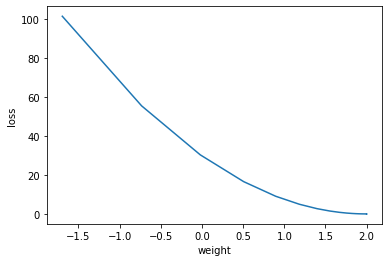

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(torch.Tensor([-3.0]), requires_grad=True)
w_list = []
l_list = []

def forward(x):
  return w * x #y_hat
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2
def gradient(x,y):
  return 2 * x * (x * w - y)

print('predict (before training)', 4, forward(4).data[0])

for epoch in range(100):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val, y_val)
    l_sum += l
    l.backward()
    print("\tgrad: ", x_val, y_val, w.grad.item())
    w.data = w.data - 0.01 * w.grad.data

    w.grad.data.zero_()
  l_list.append(l_sum / 3)
  w_list.append(w.data[0])
  print('progress:', epoch, l.item())
print('predict (after training)', '4 hours', forward(4).item())
plt.plot(w_list, l_list)
plt.xlabel('weight')
plt.ylabel('loss')
plt.show()

In [21]:
#what if y = x^2 * 2 + x * 4
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

x_data = [1.0, 2.0, 3.0]
y_data = [6.0, 16.0, 30.0]

w1 = Variable(torch.Tensor([1.0]), requires_grad=True)
w2 = Variable(torch.Tensor([1.0]), requires_grad=True)

def forward(x):
  return w2 * (x**2) + w1 * x #y_hat
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2

print('predict (before training)', 4, forward(4).data[0])

for epoch in range(200):
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val, y_val)
    l.backward()
    print("\tgrad: ", x_val, y_val, w1.grad.data[0], w2.grad.data[0])
    print('\t', w1.data[0], w2.data[0])
    w1.data = w1.data - 0.02 * w1.grad.data
    w2.data = w2.data - 0.01 * w2.grad.data
    w1.grad.data.zero_()
    w2.grad.data.zero_()
  print('progress:', epoch, l.data[0])

print('predict (after training)', '4 hours', forward(4).data[0])

predict (before training) 4 tensor(20.)
	grad:  1.0 6.0 tensor(-8.) tensor(-8.)
	 tensor(1.) tensor(1.)
	grad:  2.0 16.0 tensor(-37.4400) tensor(-74.8800)
	 tensor(1.1600) tensor(1.0800)
	grad:  3.0 30.0 tensor(-46.8864) tensor(-140.6592)
	 tensor(1.9088) tensor(1.8288)
progress: 0 tensor(61.0648)
	grad:  1.0 6.0 tensor(0.1638) tensor(0.1638)
	 tensor(2.8465) tensor(3.2354)
	grad:  2.0 16.0 tensor(10.4861) tensor(20.9721)
	 tensor(2.8433) tensor(3.2338)
	grad:  3.0 30.0 tensor(30.7013) tensor(92.1038)
	 tensor(2.6335) tensor(3.0240)
progress: 1 tensor(26.1824)
	grad:  1.0 6.0 tensor(-3.7550) tensor(-3.7550)
	 tensor(2.0195) tensor(2.1030)
	grad:  2.0 16.0 tensor(-12.9945) tensor(-25.9889)
	 tensor(2.0946) tensor(2.1405)
	grad:  3.0 30.0 tensor(-7.9957) tensor(-23.9872)
	 tensor(2.3545) tensor(2.4004)
progress: 2 tensor(1.7759)
	grad:  1.0 6.0 tensor(-1.6906) tensor(-1.6906)
	 tensor(2.5144) tensor(2.6403)
	grad:  2.0 16.0 tensor(-1.0989) tensor(-2.1977)
	 tensor(2.5482) tensor(2.6572)
